<font size="5">Section 6: Structural Equation Modelling</font>

<font size="3">**Tarea 4**</font>

<u> *Instrucciones* </u>

Los resultados de los ejericicios propuestos se deben entregar como un notebook por correo electronico a *juancaros@udec.cl* el dia 6/12 hasta las 21:00. Utilizar la base de datos *junaeb2.csv*. La base corresponde a observaciones tomadas de estudiantes de colegio. Las variables tienen la siguiente descripcion:

- sexo: sexo del estudiante
- edad: edad del estudiante (meses)
- imce: indice de masa corporal estandarizado
- vive_padre: si el padre vive en el hogar
- vive_madre: si la madre vive en el hogar
- area: urbana=1, rural=0
- sk1: muestra afecto a padres (1: siempre - 5: nunca)
- sk2: muestra afecto a sus pares (1: siempre - 5: nunca)
- sk3: expresa sus sentimientos (1: siempre - 5: nunca)
- sk4: usa gestos para mostrar sentimientos (1: siempre - 5: nunca)
- sk5: juega con otros (1: siempre - 5: nunca)
- sk6: comparte sus cosas con otros (1: siempre - 5: nunca)
- sk7: es agresivo (1: siempre - 5: nunca)
- sk8: participa en juegos grupales (1: siempre - 5: nunca)
- sk9: hace preguntas a adultos (1: siempre - 5: nunca) 
- sk10: tiene interes por libros (1: siempre - 5: nunca) 
- sk11: tiene interes por su entorno (1: siempre - 5: nunca)
- sk12: juega a armar y desarmar cosas (1: siempre - 5: nunca) 
- sk13: tiene expresiones artisticas (1: siempre - 5: nunca) 
- act_fisica: frecuencia actividad fisica (1: nunca - 5: 5 o mas veces a la semana)
- educm: años de escolaridad de la madre
- educp: años de escolaridad del padre
- madre_work: si la madre trabaja (-1: labor domestica, 0: desempleada, 1: empleada)

In [ ]:
!pip install linearmodels
!pip install semopy
!pip install factor_analyzer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.5 MB 5.0 MB/s 
     |████████████████████████████████| 68 kB 4.1 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 5.5 MB/s 
  Created wheel for semopy: filename=semopy-2.3.9-py3-none-any.whl size=1657804 sha256=b635a09ca1791f54d3c80c4b6bd418039a87fc8b0e0ad9436e560e8ad81c1a33
  Stored in directory: /root/.cache/pip/wheels/aa/d5/83/afbfa4fe06d08c0ec7849e93aa71843aa514684b3f22e3a694
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=e6bd37648f212e93d3621e6b60fff4311c73ae1dc1688608a5382f28cc5e9e90
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built semopy sklearn
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn
import scipy 
from scipy.linalg import eigh, cholesky
from scipy.stats import norm
import linearmodels.panel as lmp
from pylab import plot, show, axis, subplot, xlabel, ylabel, grid
import semopy 
import seaborn as sns
from factor_analyzer import FactorAnalyzer
from sklearn.decomposition import PCA

from sklearn.preprocessing import OneHotEncoder

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

# Pregunta 1

1. Cargue la base de datos y realice los ajustes necesarios para su uso (missing values, recodificar variables, etcetera). Identifique los tipos de datos que se encuentran en la base, realice estadisticas descriptivas sobre las variables importantes (Hint: Revisar la distribuciones, datos faltantes, outliers, etc.) y limpie las variables cuando sea necesario. 

In [ ]:
try:
    df = pd.read_csv("../data/junaeb2.csv")
except:
    try:
        df = pd.read_csv("../../data/junaeb2.csv")
    except:
        df = pd.read_csv("https://raw.githubusercontent.com/juancaros/LAB-MAA/main/data/junaeb2.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59999 entries, 0 to 59998
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sexo        59999 non-null  int64  
 1   edad        59999 non-null  int64  
 2   imce        59999 non-null  float64
 3   vive_padre  59999 non-null  int64  
 4   vive_madre  59999 non-null  int64  
 5   sk1         59999 non-null  int64  
 6   sk2         59999 non-null  int64  
 7   sk3         59999 non-null  int64  
 8   sk4         59999 non-null  int64  
 9   sk5         59999 non-null  int64  
 10  sk6         59999 non-null  int64  
 11  sk7         59999 non-null  int64  
 12  sk8         59999 non-null  int64  
 13  sk9         59999 non-null  int64  
 14  sk10        59999 non-null  int64  
 15  sk11        59999 non-null  int64  
 16  sk12        59999 non-null  int64  
 17  sk13        59999 non-null  int64  
 18  act_fisica  58033 non-null  float64
 19  area        59999 non-nul

In [ ]:
junaeb = df.copy()
mean = junaeb.edad.mean()
std = junaeb.edad.std()
junaeb = junaeb[(junaeb.edad > mean - 3 * std) & (junaeb.edad < mean + 3 * std)]
junaeb = junaeb[junaeb.vive_padre != 2]
junaeb = junaeb[junaeb.vive_madre != 2]
junaeb["madre_trabaja"] = junaeb['madre_work'].apply(lambda x: 0 if x == 0 else 1)
junaeb["madre_empleada"] = junaeb['madre_work'].apply(lambda x: 1 if x == 1 else 0)
junaeb.dropna(inplace = True)
junaeb.reset_index(inplace = True)

Se realizó una limpieza de datos, la cual puede ser vista en mayor profunidad en el anexo.
En primer lugar llama la atención la distribución etaria del estudio, en donde la mayoría pareciera ser de una mayor edad, resultado un promedio de edades de aproximadamente 82 años.

Además se encontraron algunas filas en vive_padre y vive_madre que fueron codificados como 2, dada la naturaleza binaria de estas viariables estas filas fueron omitidas.

Se recodificó la variable madre_work, dado que es categorica, en 2 variables.
La recodificación genera 2 nuevas variables: 
1.  madre_trabaja: indica si la madre trabaja o no (0 en caso de que sea desempleada, 1 en los otros 2 casos)
2.  madre_empleda:  indica si la madre es empleada (1 si es empleada, 0 si no trabaja o si realiza labores domésticas).



# Pregunta 2


2. Usando las variables sk1-sk13 realice un PCA. En particular, identifique los valores propios y determine el numero optimo de componentes. Luego estime y grafique la distribucion de los componentes. Ademas discuta la importancia relativa de las variables sobre cada uno de los componentes estimados. Que se puede concluir de este analisis?


In [ ]:
sk_vars = [f'sk{i+1}' for i in range(13)]
junaeb[sk_vars] = 6 - junaeb[sk_vars]
sk = junaeb[sk_vars]

Se transformaron las variables sk para que expresen el sentido contrario al original, inviertonda la escala. Es decir, en vez de 1: Siempre y 5: Nunca, pasa a ser 5: Siempre y 1: Nunca.


Si bien el PCA está diseñado para valores continuos, se asumirá que no generará un efecto tan grande.



[0.28325097 0.18947031 0.10030152 0.07959822 0.06710186 0.06395742
 0.05208095 0.04369425 0.03260041 0.02946809 0.02489866 0.02105562
 0.01252172]


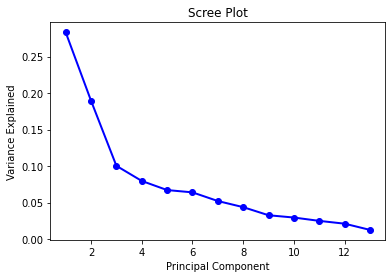

In [ ]:
#scree plot using explained variance proportion

pca = PCA(n_components=len(sk.columns))
pca_features = pca.fit_transform(sk)
print(pca.explained_variance_ratio_) # Imprimir los factores propios

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

Primero se realizó un scree plot para un PCA con número de factores igual al número de variables, en el cual se puede observar que el posible número óptimo de parámetros es 3, dado que ahi ocurre el punto de inflexión donde la cantidad de varianza explicada adicional es minima para los demas componentes. SE decide volver a definir un PCA, pero ahora con 3 factores. Para los cuales los valores propios corresponde a 0.28325097, 0.18947031 y 0.10030152

[0.28325097 0.18947031 0.10030152]


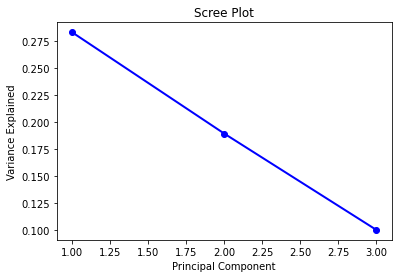

In [ ]:
#scree plot using explained variance proportion

pca = PCA(n_components=3)
pca_features = pca.fit_transform(sk)
print(pca.explained_variance_ratio_)

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [ ]:
pca_vectors = pd.DataFrame(data = pca.components_)
pca_vectors.head()

0         1         2         3         4         5         6   \
0 -0.102512 -0.228558 -0.168733 -0.183869 -0.183352 -0.251857 -0.352430   
1 -0.008483 -0.033357 -0.063066 -0.053761 -0.041009  0.028826  0.922524   
2 -0.082905 -0.268985 -0.182572 -0.189084 -0.295423 -0.331838  0.113989   

         7         8         9         10        11        12  
0 -0.292296 -0.236969 -0.403957 -0.285545 -0.291583 -0.427069  
1 -0.104449 -0.087411 -0.169113 -0.103665 -0.156056 -0.236927  
2 -0.483936 -0.079038  0.384483  0.000188  0.091548  0.494625

Existen variables que no tienen una asociación fuerte con ningún factor, o tienen números similares para más de un factor, adicionalmente en el siguiente gráfico se puede ver que los factores no poseen correlaciones entre sí.

In [ ]:
pca_df = pd.DataFrame(data=pca_features,columns= [f'PC{i+1}' for i in range(3)])
pca_df.corr().apply(lambda s: s.apply('{0:.3f}'.format))

PC1     PC2     PC3
PC1   1.000  -0.000  -0.000
PC2  -0.000   1.000   0.000
PC3  -0.000   0.000   1.000

In [ ]:
pca_scatter  =pd.concat((pca_df, sk), axis = 1)

En los siguiente graficos se puede ver la distribución de los componentes, a los que se les aplica un color dependienddo de cada una de las 13 variables.

PC1 y PC2: Comparando con la variable SK7 se ve que ambos contribuyen información, debido a que en el grafico se pueden aprecian ciertas lineas horizontales pero, con cierta pendiente positiva, indicando que ambas variables influyen a la clasificación de la variables

PC2 y PC3: Comparando con la variable SK7 se aprecia que para los valores positivos, se pueden ver ciertas lineas verticales indicando que la variable PC2 esta entregando mas información que PC3. Mientras que para los valores negativos es mas notorio que ambas variables estan entregando información (lineas pendiente negativa)

PC1 y PC3: se probó utilizando distintas variables pero el grafico no indica una relación visual clara, pudiendo referirse a que no entregan mucha información ambas variables.

Para las variables sk2, sk5, sk6 (especialmente en el gráfico PC1 vs PC2), sk10 y sk13  se pueden diferencias algunos grupos de color, aunque en forma menos evidente que las variables mencionadas anteriormente,

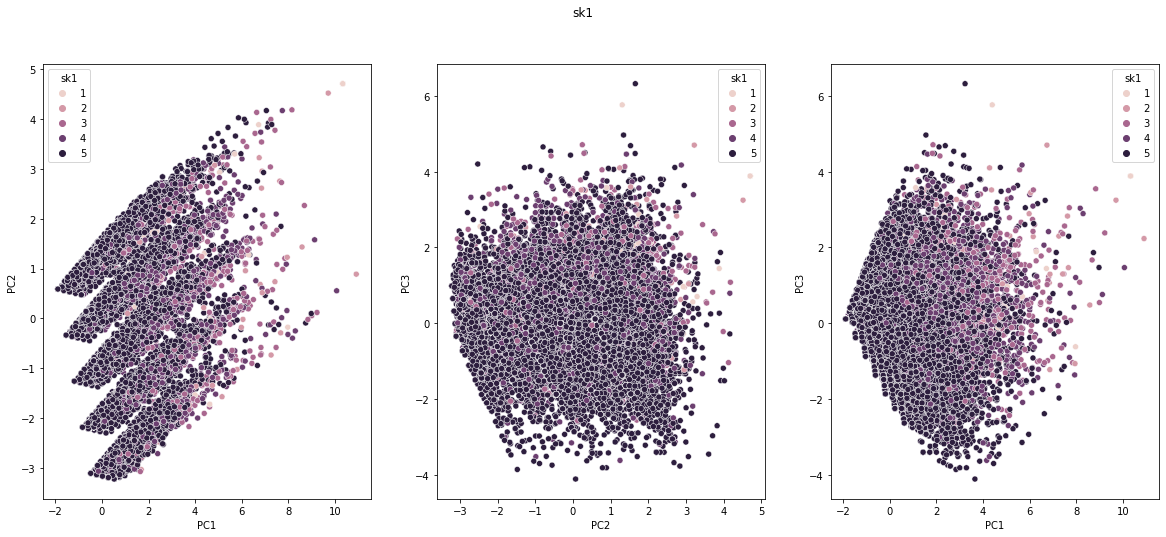

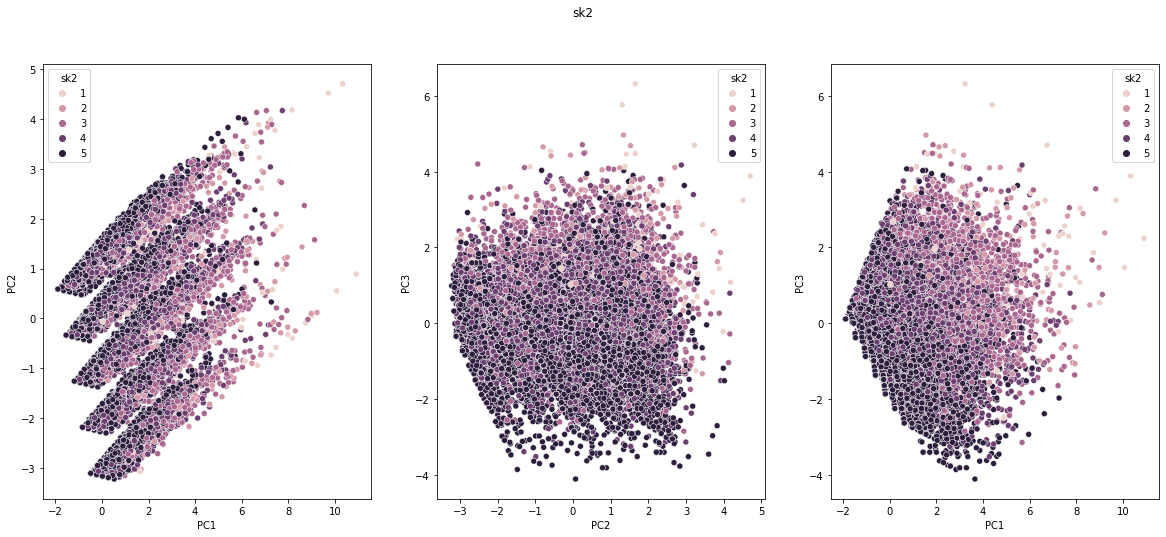

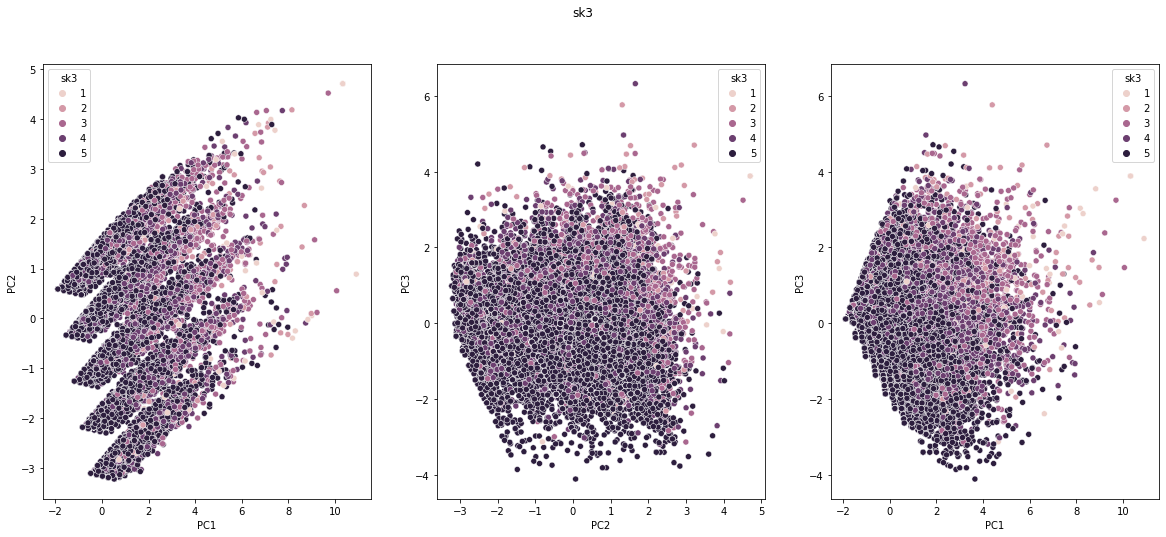

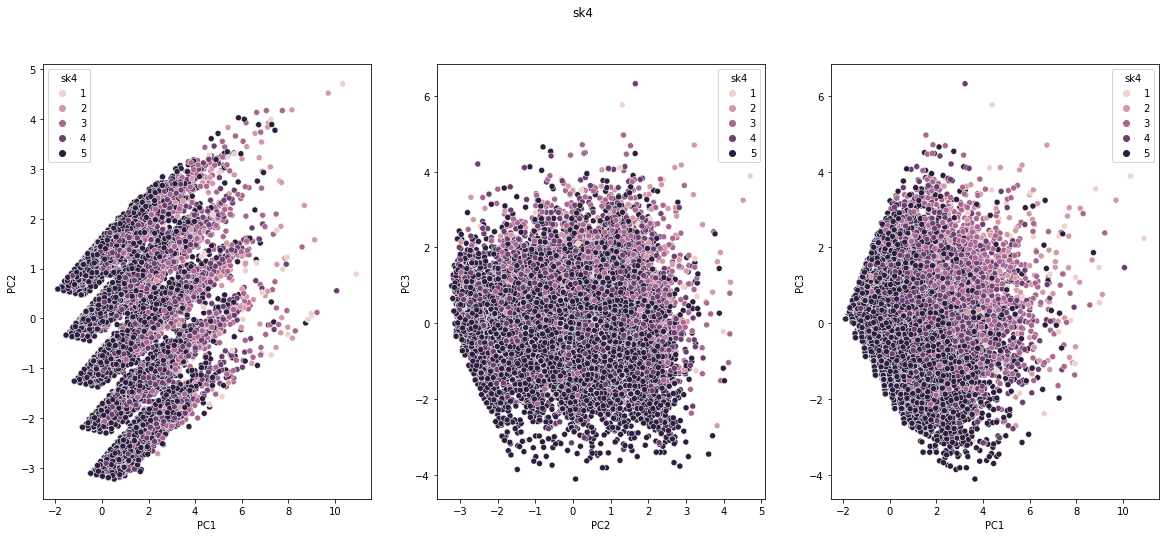

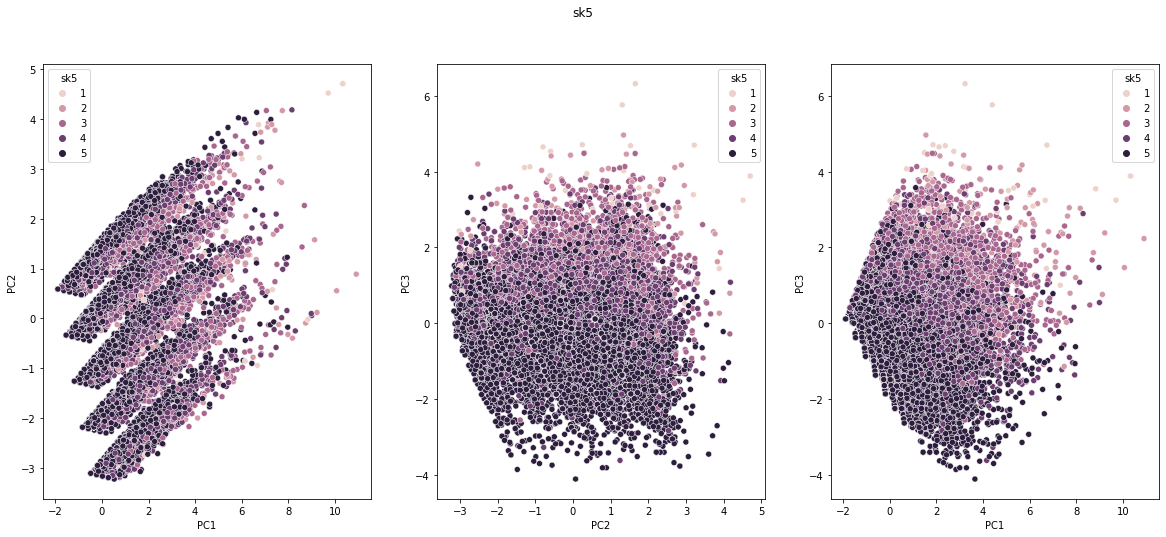

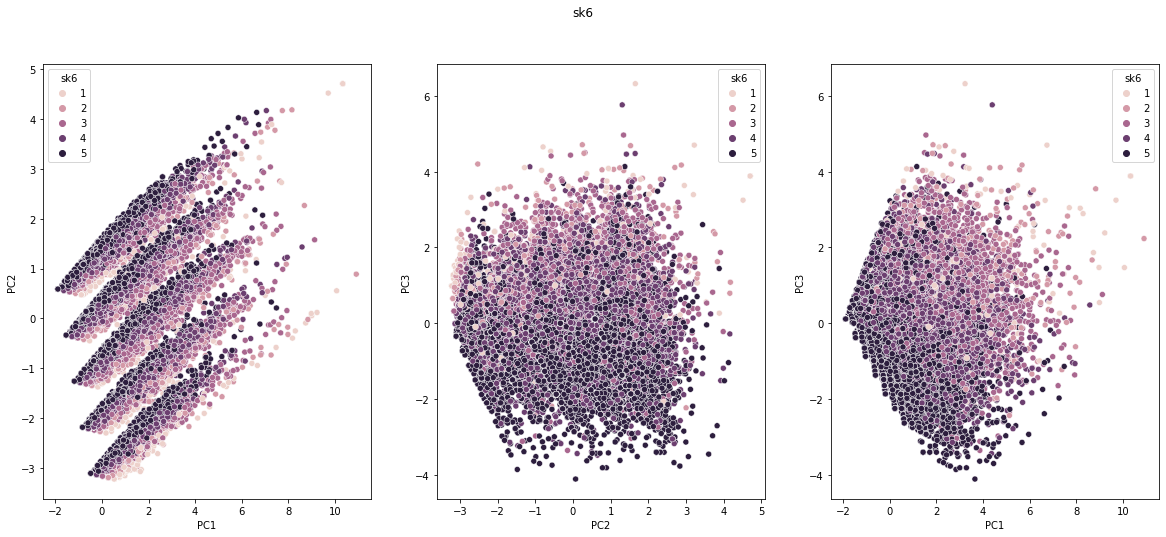

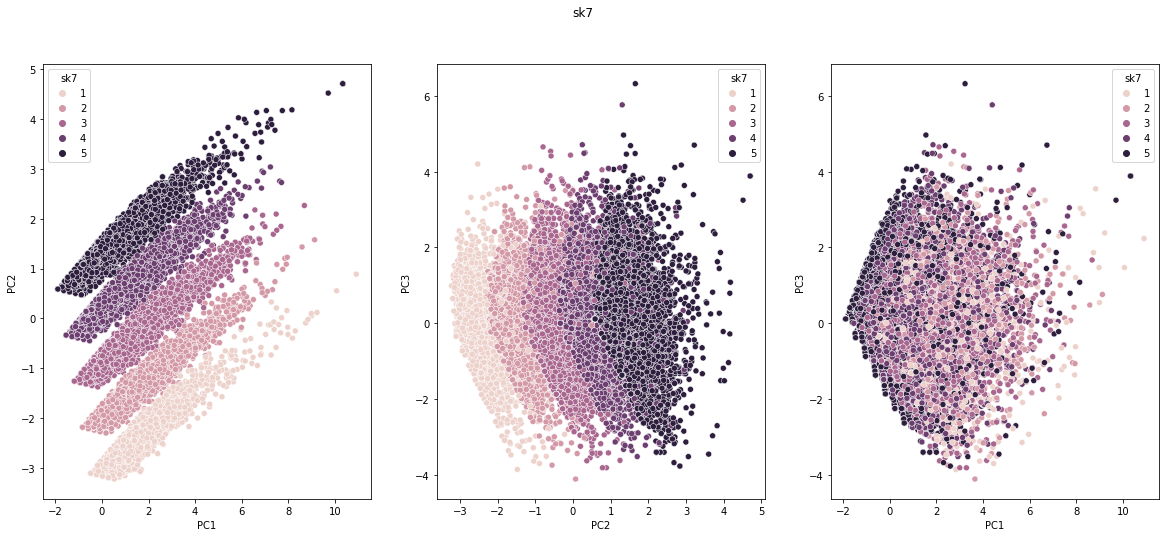

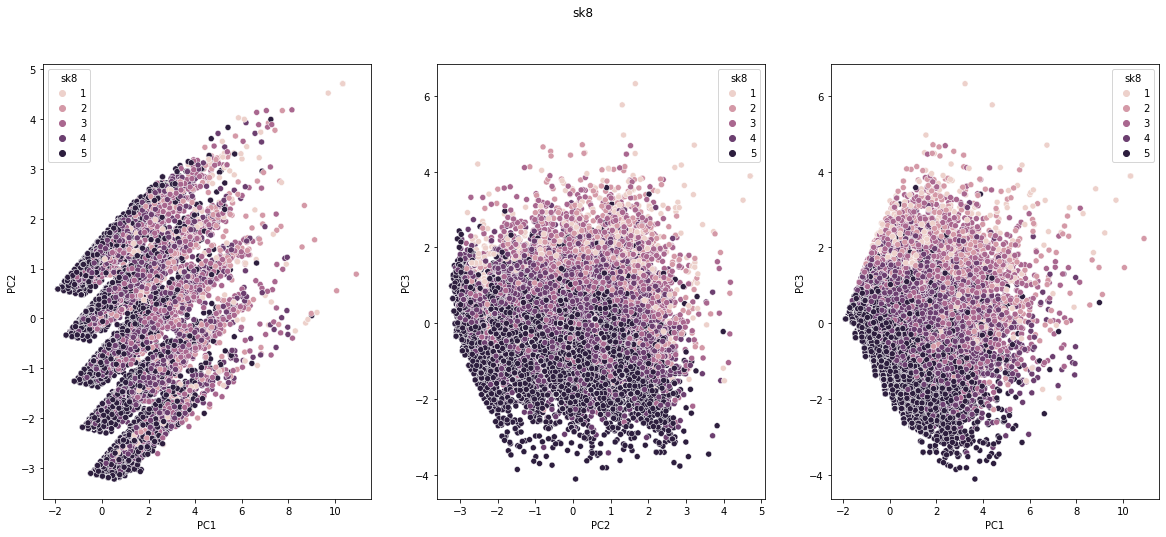

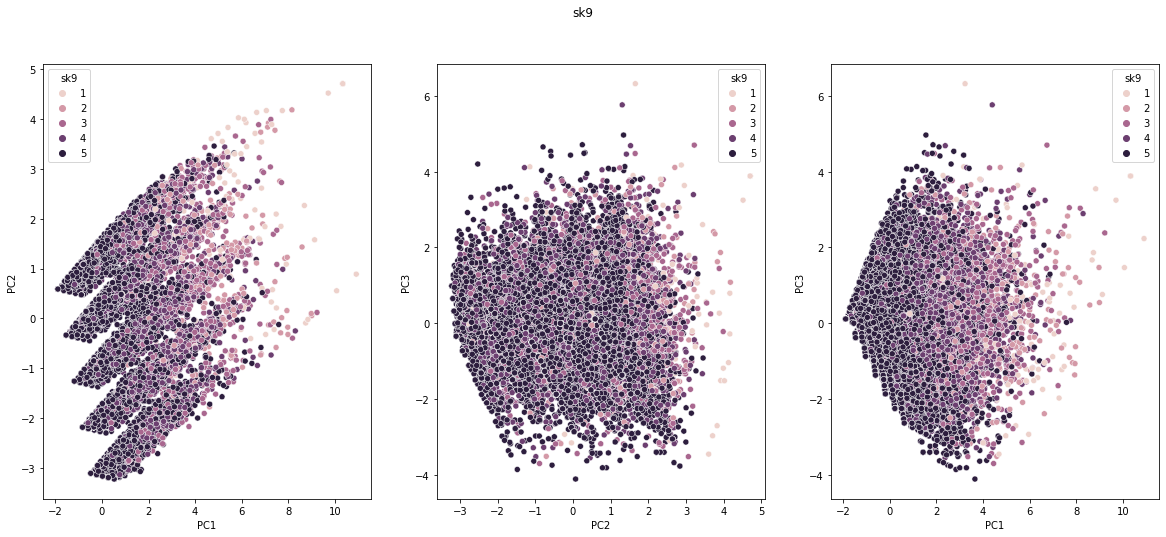

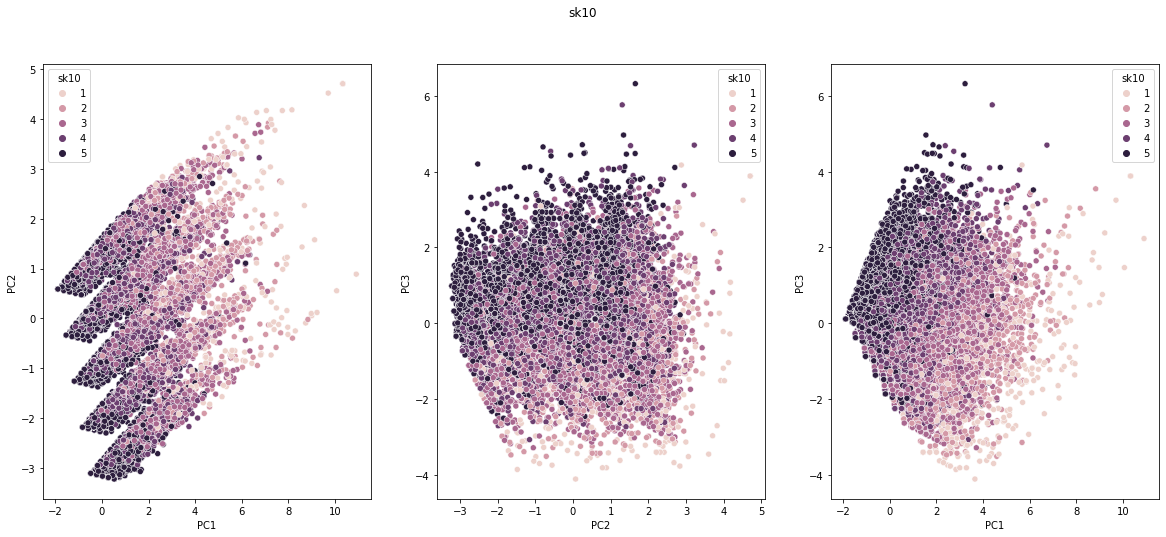

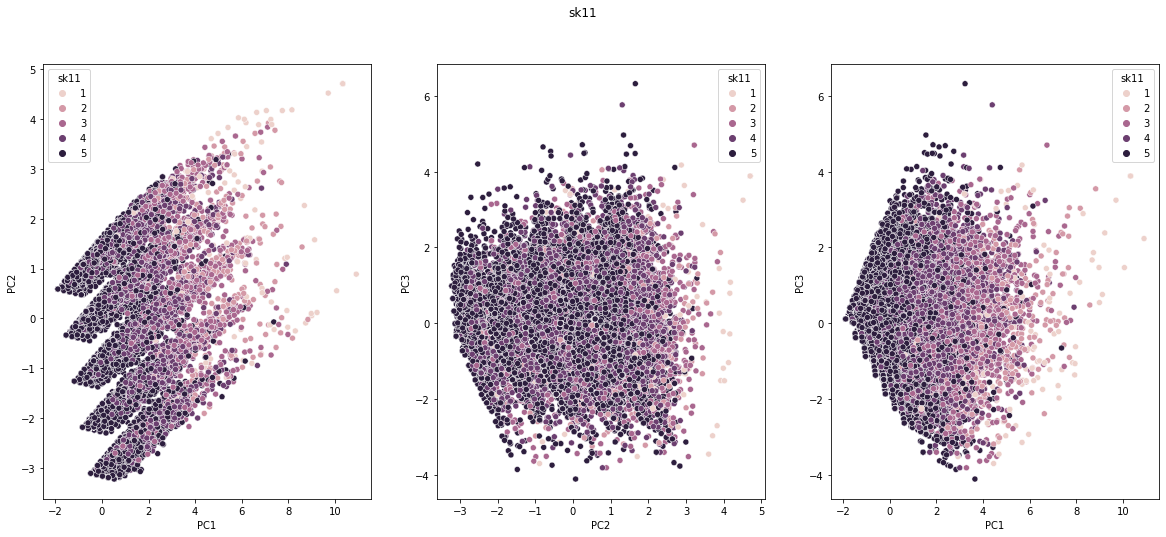

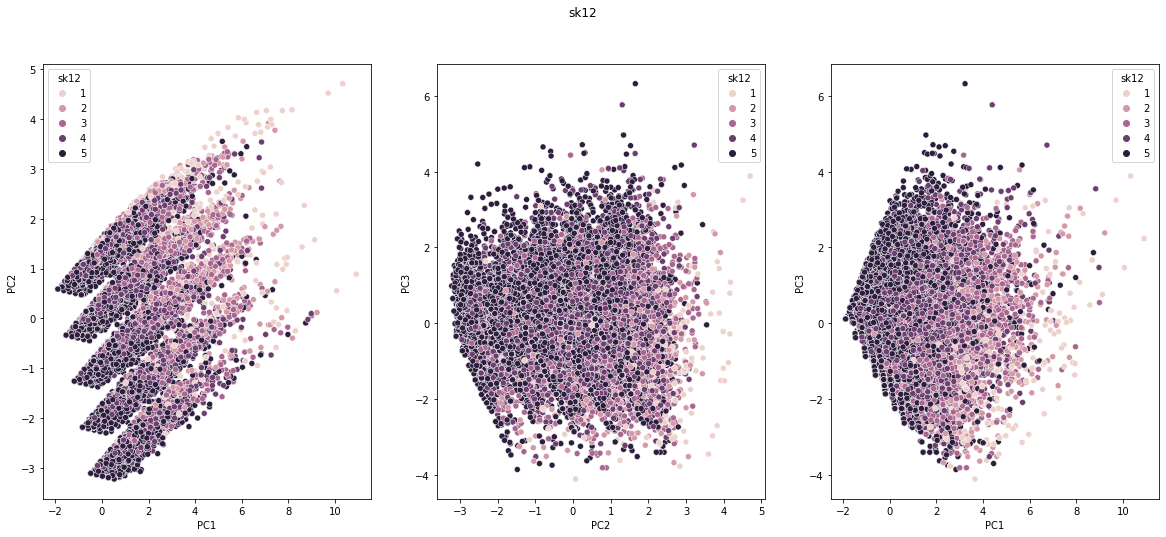

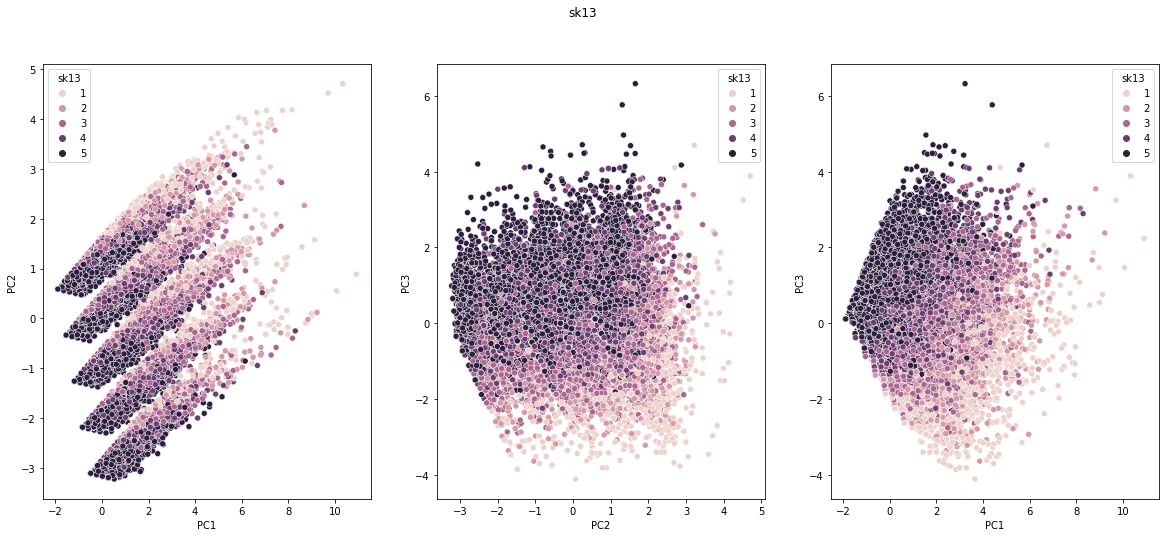

In [ ]:
for s in sk_vars:
    fig, ax = plt.subplots(1,3, figsize = (20,8))
    fig.suptitle(s)
    sns.scatterplot('PC1', 'PC2', data=pca_scatter, ax = ax[0], hue = s)
    sns.scatterplot('PC2', 'PC3', data=pca_scatter, ax = ax[1], hue = s)
    sns.scatterplot('PC1', 'PC3', data=pca_scatter, ax = ax[2], hue = s)

# Pregunta 3

3. Con los resultados de la Pregunta 2, mantenga los primeros 3 componentes principales. Graficamente indique si existen diferencias significativas entre grupos usando las siguientes variables: sexo, area, madre_work y act_fisica. Que puede concluir de los resultados?

In [ ]:
junaeb2 = junaeb[[ 'sexo', 'area', 'madre_trabaja', 'madre_empleada','act_fisica']] # madre_trabaja, madre_empleada  'madre_work'

[0.62959487 0.14675232 0.13589239]


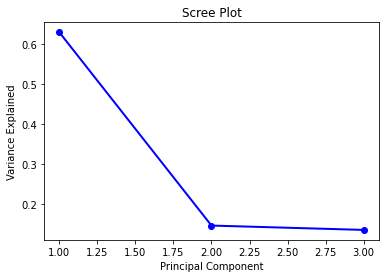

In [ ]:
#scree plot using explained variance proportion

pca = PCA(n_components=3)
pca_features = pca.fit_transform(junaeb2)
print(pca.explained_variance_ratio_)

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [ ]:
pca_vectors = pd.DataFrame(data = pca.components_)
pca_vectors.head()

0         1         2         3         4
0  0.028420 -0.021011  0.003504 -0.009230  0.999326
1  0.197651 -0.070726 -0.279349 -0.936844 -0.014782
2 -0.979859 -0.015490 -0.057970 -0.188681  0.026001

Alta relación entre PC3 y Sexo, PC2 y madre trabaja, Pc1 y madre empleada.

A continuación se presnetan las diferencias significativas presentadas para cada una de las variables utilizadas. En este caso se pueden diferenciar grupos rapidamente para todos los casos.

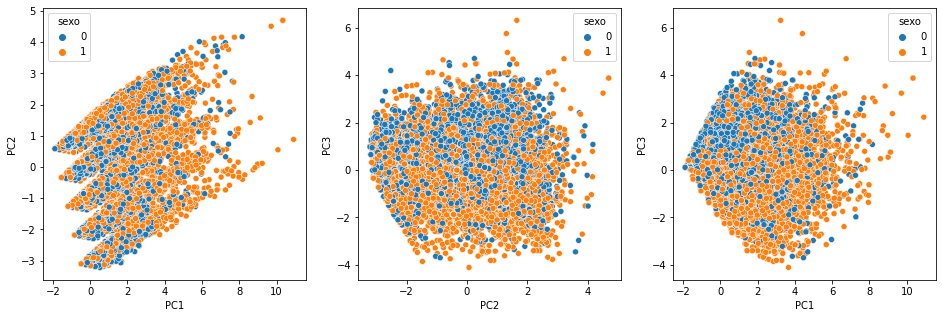

In [ ]:
pca_scatter  =pd.concat((pca_df, junaeb2), axis = 1)
fig, ax = plt.subplots(1,3, figsize = (16,5))
h = 'sexo'
sns.scatterplot('PC1', 'PC2', data=pca_scatter, ax = ax[0], hue = h)
sns.scatterplot('PC2', 'PC3', data=pca_scatter, ax = ax[1], hue = h)
sns.scatterplot('PC1', 'PC3', data=pca_scatter, ax = ax[2], hue = h)

A Partir del grafico, la relación entre PC1 y PC2, no hay una separación clara de los resultados no habiendo una relación clara

Para PC3-PC2 y PC1-PC3 se ve una diferenciación clara filtrando por sexo, creando una "linea" horizontal entre ellas. Para PC1 - PC2 se ven grupos pero cuya definicion no es tan clara como los anteriores, en que se podría trazar facilmente una recta que separara ambos grupos


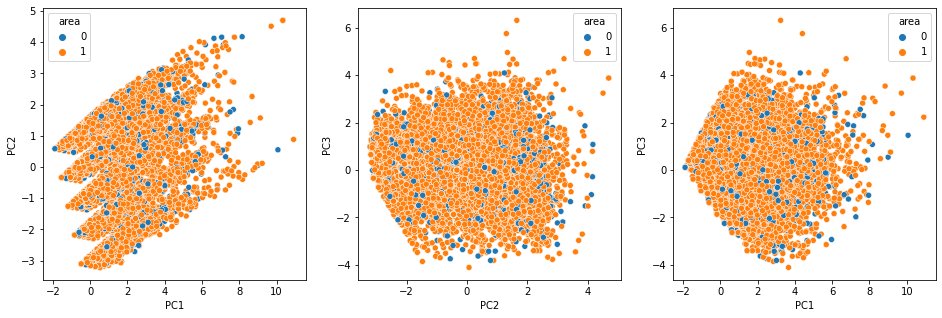

In [ ]:
pca_scatter  =pd.concat((pca_df, junaeb2), axis = 1)
fig, ax = plt.subplots(1,3, figsize = (16,5))
h = 'area'
sns.scatterplot('PC1', 'PC2', data=pca_scatter, ax = ax[0], hue = h)
sns.scatterplot('PC2', 'PC3', data=pca_scatter, ax = ax[1], hue = h)
sns.scatterplot('PC1', 'PC3', data=pca_scatter, ax = ax[2], hue = h)

Para el caso de la variable área, se ven diferencias en los gráficos para todas las combinaciones de factores, sin embargo están no son tan claras como las de la variable sexo

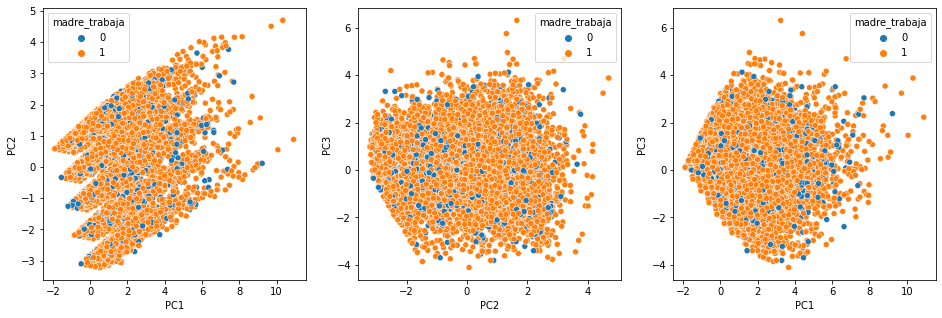

In [ ]:
pca_scatter  =pd.concat((pca_df, junaeb2), axis = 1)
fig, ax = plt.subplots(1,3, figsize = (16,5))
h = 'madre_trabaja'
sns.scatterplot('PC1', 'PC2', data=pca_scatter, ax = ax[0], hue = h)
sns.scatterplot('PC2', 'PC3', data=pca_scatter, ax = ax[1], hue = h)
sns.scatterplot('PC1', 'PC3', data=pca_scatter, ax = ax[2], hue = h)

En este caso para las combinaciones PC1-PC2 y PC2-PC3 se ven difererencias claras en el eje correspondiente a PC2, lo que insinua que este factor es el más relacionado a la variable madre_trabaja (Proveniente de MAdre Work)

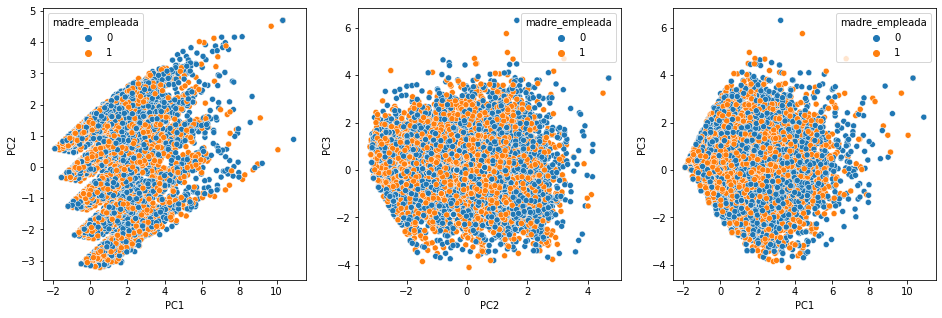

In [ ]:
pca_scatter  =pd.concat((pca_df, junaeb2), axis = 1)
fig, ax = plt.subplots(1,3, figsize = (16,5))
h = 'madre_empleada'
sns.scatterplot('PC1', 'PC2', data=pca_scatter, ax = ax[0], hue = h)
sns.scatterplot('PC2', 'PC3', data=pca_scatter, ax = ax[1], hue = h)
sns.scatterplot('PC1', 'PC3', data=pca_scatter, ax = ax[2], hue = h)

Para la variable madre_empleada PC1-PC2 y PC2-PC3 se ven difererencias claras en el eje correspondiente a PC2 nuevamente, lo que insinua que este factor es el más relacionado a la variable.

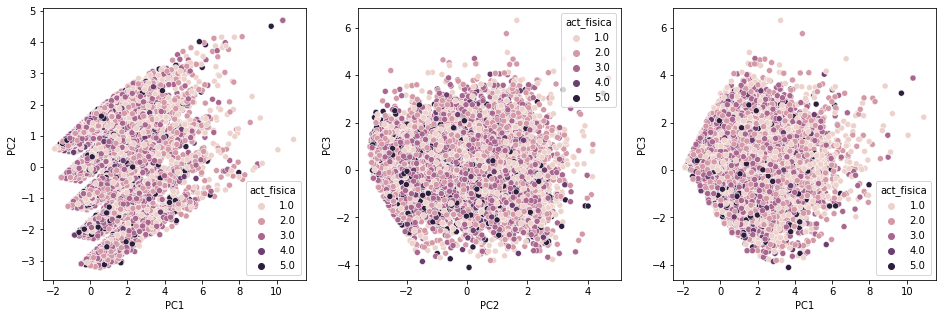

In [ ]:
pca_scatter  =pd.concat((pca_df, junaeb2), axis = 1)
fig, ax = plt.subplots(1,3, figsize = (16,5))
h = 'act_fisica'
sns.scatterplot('PC1', 'PC2', data=pca_scatter, ax = ax[0], hue = h)
sns.scatterplot('PC2', 'PC3', data=pca_scatter, ax = ax[1], hue = h)
sns.scatterplot('PC1', 'PC3', data=pca_scatter, ax = ax[2], hue = h)

Finalmente al graficar las combinaciones de factores, asignando color según la act_fisica asociada, se pueden ver diferencias de grupos en los ejes que incluyen aal factor PC1, lo que indica que este se relaciona con la variable act_fisica.

# Pregunta 4

4. A partir del mismo set de variables sk1-sk13 realice un EFA. En particular determine el numero optimo de factores y las variables que se asocian a cada factor. Tambien discuta si existen variables que no son informativas (Hint: para realizar un EFA, todas las variables deben estar representatadas en el mismo sentido logico. Si una carateristica es negativa debe ser invertida en la escala, de tal forma que todas las variables representen aspectos positivos).

In [ ]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(rotation='promax')
fa.fit(sk)

FactorAnalyzer(rotation_kwargs={})

In [ ]:
fa.loadings_

array([[ 0.01364962,  0.60268962, -0.03425554],
       [-0.03642904,  0.49078497,  0.23392701],
       [ 0.02709609,  0.64435192, -0.04501677],
       [ 0.00425373,  0.73875116, -0.03567302],
       [-0.14432621, -0.02896221,  0.85824447],
       [ 0.00703791,  0.04023962,  0.51404974],
       [ 0.0123327 ,  0.04133763,  0.14001644],
       [ 0.14943376, -0.10910951,  0.50966003],
       [ 0.47937536,  0.08418939,  0.04971678],
       [ 0.61756808, -0.03742814, -0.03088626],
       [ 0.69295865,  0.03221508,  0.00410174],
       [ 0.56651891, -0.01862305, -0.00774673],
       [ 0.52366539,  0.0156779 , -0.007063  ]])

In [ ]:
pd.DataFrame(fa.loadings_, columns = ['PC1', 'PC2', 'PC3'], index = sk_vars)

PC1       PC2       PC3
sk1   0.013650  0.602690 -0.034256
sk2  -0.036429  0.490785  0.233927
sk3   0.027096  0.644352 -0.045017
sk4   0.004254  0.738751 -0.035673
sk5  -0.144326 -0.028962  0.858244
sk6   0.007038  0.040240  0.514050
sk7   0.012333  0.041338  0.140016
sk8   0.149434 -0.109110  0.509660
sk9   0.479375  0.084189  0.049717
sk10  0.617568 -0.037428 -0.030886
sk11  0.692959  0.032215  0.004102
sk12  0.566519 -0.018623 -0.007747
sk13  0.523665  0.015678 -0.007063

A partir del metodo pro max se estiman pesos relativos y el numero de factores resulta ser 3. Aquí salta la atención respecto a que tan informativa es la variable sk7, ya que no se asocia en forma fuerte a algun factor en especifico.

In [ ]:
fa.get_eigenvalues() #original eigenvalues y common factor eigenvalues

(array([3.97194099, 1.3606774 , 1.10573516, 0.99945812, 0.78767797,
        0.71753445, 0.70951584, 0.69900009, 0.61413939, 0.53317744,
        0.52112931, 0.5025337 , 0.47748014]),
 array([ 3.37373677,  0.76582593,  0.59033664,  0.20711582,  0.08703898,
         0.06286435,  0.035794  ,  0.02747806, -0.02400405, -0.07755832,
        -0.09409038, -0.11231338, -0.17587107]))

Utlizando semopy, la aproximación de la representación del modelo resulta ser en 4 factores latentes vs los 3 factores obtenidos en promax. En el otput de la siguiente celda además se puede ver como las variables se distribuyen por los distintos factores.

In [ ]:
print(semopy.efa.explore_cfa_model(sk, pval=0.05))

eta1 =~ sk11 + sk9 + sk10 + sk12
eta2 =~ sk6 + sk7
eta3 =~ sk4 + sk2 + sk11 + sk5 + sk3 + sk9 + sk1 + sk8 + sk12
eta4 =~ sk11 + sk12 + sk13



# Pregunta 5

5. Con los resultados obtenidos en la Pregunta 4, proponga un CFA donde cada variable solo se asocia con un factor. Entregue un nombre a cada factor que representa el concepto comun entre todas las variables. Reporte la importancia de cada medida (variable) a cada factor e indique la correlacion entre factores. 

Se utilizan 3 factores llamados Habilidades de Descubrimiento y Creación(descubrimiento), Habilidades Afectivas (afectivas) y Habilidades de Socialización (socializacion), esto después de haber clasificado los elementos de la tabla de factores para la estiamción promax de la pregunta anterior y ver si existe algún nombre que agrupe a los factores.
Estos factores se agrupan en la siguiente forma:

Habilidades de Descubrimiento y Creación:
- sk9: hace preguntas a adultos (1: nunca - 5: siempre) 
- sk10: tiene interes por libros (1: nunca - 5: siempre) 
- sk11: tiene interes por su entorno (1: nunca - 5: siempre)
- sk12: juega a armar y desarmar cosas (1: nunca - 5: siempre) 
- sk13: tiene expresiones artisticas (1: nunca - 5: siempre)

Habilidades Afectivas
- sk1: muestra afecto a padres (1: nunca - 5: siempre)
- sk2: muestra afecto a sus pares (1: nunca - 5: siempre)
- sk3: expresa sus sentimientos (1: nunca - 5: siempre)
- sk4: usa gestos para mostrar sentimientos (1: nunca - 5: siempre)

Habilidades de Socialización
- sk5: juega con otros (1: nunca - 5: siempre)
- sk6: comparte sus cosas con otros (1: nunca - 5: siempre)
- sk8: participa en juegos grupales (1: nunca - 5: siempre)

Finalmente el orden de las variables en el modelo se deteminó rankeando como afectan estas a cada factor, dado que los pesos se determinan tomandola como referencia.

In [ ]:
mod = """
# measurement model
descubrimiento =~ sk11 + sk9 + sk10  +sk12 + sk13
afectivas =~ sk4 + sk1 + sk2 + sk3 
socializacion =~ sk5 + sk6 + sk8
    """

model = semopy.Model(mod)
out=model.fit(sk)
print(out)

Name of objective: MLW
Optimization method: SLSQP
Optimization successful.
Optimization terminated successfully
Objective value: 0.140
Number of iterations: 32
Params: 0.795 1.094 0.900 1.058 0.554 1.065 0.915 1.020 1.147 0.242 0.202 0.195 0.273 0.694 0.589 0.365 0.159 0.429 0.149 0.090 0.478 0.151 0.108 0.100 0.222 0.107 0.156


Una vez estimado el modelo se evalua su ajuste, observando que todas las relaciones planteadas entre factores y variables son significativas.

In [ ]:
model.inspect(mode='list', what="names", std_est=True)

lval  op            rval  Estimate  Est. Std  Std. Err  \
0             sk11   ~  descubrimiento  1.000000  0.723489         -   
1              sk9   ~  descubrimiento  0.794963  0.582444  0.007079   
2             sk10   ~  descubrimiento  1.094109  0.557499  0.010099   
3             sk12   ~  descubrimiento  0.900459  0.543437  0.008492   
4             sk13   ~  descubrimiento  1.057554  0.513197  0.010478   
5              sk4   ~       afectivas  1.000000  0.697841         -   
6              sk1   ~       afectivas  0.553990  0.582797  0.004948   
7              sk2   ~       afectivas  1.064869  0.644010  0.008814   
8              sk3   ~       afectivas  0.915012  0.627150   0.00772   
9              sk5   ~   socializacion  1.000000  0.715107         -   
10             sk6   ~   socializacion  1.020033  0.554582  0.010598   
11             sk8   ~   socializacion  1.146704  0.547862  0.012007   
12       afectivas  ~~       afectivas  0.151130  1.000000  0.001844   
13       afectivas  ~~  descubrimiento  0.108097  0.590388  0.001314   
14       afectivas  ~~   socializacion  0.099826  0.650428  0.001182   
15  descubrimiento  ~~  descubrimiento  0.221820  1.000000  0.002615   
16  descubrimiento  ~~   socializacion  0.106894  0.574891  0.001357   
17   socializacion  ~~   socializacion  0.155861  1.000000  0.002052   
18             sk2  ~~             sk2  0.241824  0.585251  0.001835   
19            sk11  ~~            sk11  0.201957  0.476564  0.001827   
20             sk3  ~~             sk3  0.195175  0.606683  0.001447   
21             sk9  ~~             sk9  0.273042  0.660759  0.001939   
22            sk13  ~~            sk13  0.693885  0.736629  0.004656   
23            sk10  ~~            sk10  0.588810  0.689194  0.004086   
24             sk6  ~~             sk6  0.365103  0.692439  0.002671   
25             sk4  ~~             sk4  0.159210  0.513019  0.001331   
26            sk12  ~~            sk12  0.429162  0.704677  0.002944   
27             sk5  ~~             sk5  0.148925  0.488622  0.001574   
28             sk1  ~~             sk1  0.090176  0.660347  0.000636   
29             sk8  ~~             sk8  0.477858  0.699847  0.003468   

       z-value p-value  
0            -       -  
1    112.29294     0.0  
2   108.338009     0.0  
3   106.034615     0.0  
4   100.930772     0.0  
5            -       -  
6   111.964635     0.0  
7   120.815923     0.0  
8   118.521014     0.0  
9            -       -  
10   96.252221     0.0  
11    95.50193     0.0  
12   81.953841     0.0  
13   82.246763     0.0  
14   84.433063     0.0  
15    84.82727     0.0  
16   78.767626     0.0  
17   75.962398     0.0  
18  131.805105     0.0  
19  110.547791     0.0  
20  134.901406     0.0  
21  140.815089     0.0  
22  149.018677     0.0  
23  144.117345     0.0  
24  136.684736     0.0  
25  119.618784     0.0  
26  145.795142     0.0  
27    94.63517     0.0  
28  141.745112     0.0  
29  137.801355     0.0

In [ ]:
semopy.calc_stats(model)

DoF  DoF Baseline         chi2  chi2 p-value  chi2 Baseline       CFI  \
Value   51            66  7830.430197           0.0  147409.547889  0.947202   

           GFI      AGFI      NFI       TLI     RMSEA        AIC         BIC  \
Value  0.94688  0.931256  0.94688  0.931673  0.052192  53.720337  294.913743   

         LogLik  
Value  0.139832

Además, se encuentra un error cuadratico bastante bajo, indicando que el modelo estimado esta bien ajustado.
Finalmente, se muestra gráficamente el modelo.

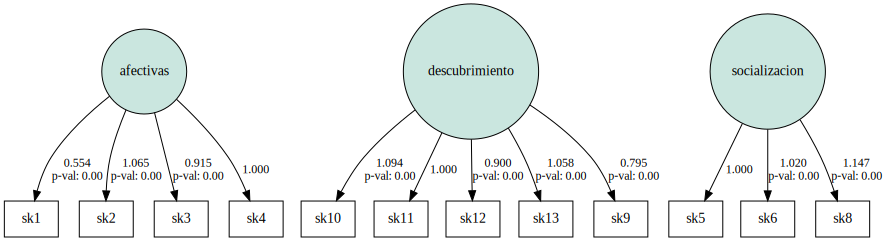

In [ ]:
semopy.semplot(model, "model.png")

# Pregunta 6

6. Finalmente, implemente un SEM completo usando la estructura propuesta en la Pregunta 5. En particular, estime un modelo donde los factores explican el nivel de actividad fisica, junto con otras variables que existen en la base de datos. Ademas utilice otras variables relevantes de la base de datos para explicar los factores latentes. Las variables a incluir en el modelo final deben tener sustento teorico y el modelo final debe optimizar el ajuste a los datos, en base a los criterios vistos en clase. Que puede concluir en base a sus resultados?

Se tomó el modelo ateriormente propuesto y se le agregaron algunas variables, las cuales corresponde a la siguientes:
- Factor de habilidades de descubrimiento:
    - *vive_madre:* fue añadida junto a vive_padre bajo el argumento de que la presencia de los padres pueden favorecer al desarrollo de las habilidades de descubrimiento de los iños y niñas mediante por ejemplo juegos, sin embargo vive_padre no fue significativo por lo que se eliminó del modelo.
    - *area*: se añadió la cercanía a las áreas urbanas a rurales de los niños bajo el pretexto de que el ambiente en el que se desarrollen puede brindarles más opciones de descubrimiento a los infantes.

- Factor de habilidades de habilidades afectivas:
    - *madre_trabaja* y *madre_empleada*: se agregaron pensando en que si bien los niños y niñas pueden vivir con sus madres, el si es que estas se involucran en la crianza durante todo el día o tienen un empleo que les obligue a salir del higar puede generar diferencias.

- Factor de habilidades sociales:
    - *vive_padre*: se añadió junto a vive_madre bajo la idea de que la rpesencia de los padres afecta a los niños y niñas en el desarrollo de las habilidades sociales, al ser las primeras personas con las que se suelen relacionar en la vida. Sin embargo vive_madre resultó no ser significatibo por lo que se sacó del modelo.
    - *edad*: tomando la idea de que las habilidades sociales mejoran a medida que los individuos crecen.

Luego se estabeción como regersiones propuestas explicar la act_fisica como la suma de los 3 factores descritos en los modelos anteriores, a los que además se les añade el área y la edad como factores explicativos.

Finalmente se le indica al modelo la existencia de varias correlaciones basadas en el heatmap presente en el anexo 2

In [ ]:
mod = """
# measurement model
desc =~ sk9 + sk10 + sk11  +sk12 + sk13 + area + vive_madre
afect =~ sk1 + sk2 + sk3 + sk4 + madre_trabaja + madre_empleada
social =~ sk5 + sk6 + sk8 + edad + vive_padre

# regressions
act_fisica ~ desc + afect + social + area + edad

# residual correlations
vive_padre ~~ sk1
vive_madre ~~ sk1
vive_madre ~~  madre_trabaja
vive_madre ~~  madre_empleada
madre_trabaja ~~ madre_empleada
sk3 ~~ sk4
sk5 ~~ sk8
sk9 ~~ sk11
    """

# imce ~ desc + afect + social + act_fisica

mod = semopy.Model(mod)
out=mod.fit(junaeb)
print(out)

Name of objective: MLW
Optimization method: SLSQP
Optimization successful.
Optimization terminated successfully
Objective value: 0.187
Number of iterations: 72
Params: 1.482 1.288 1.213 1.443 0.023 0.018 1.996 1.407 1.578 0.043 0.105 1.118 1.148 -0.880 0.055 0.250 -0.527 0.616 -0.270 0.003 0.004 0.200 0.001 0.002 0.004 0.024 0.052 0.093 0.050 0.224 0.031 0.168 0.023 0.288 0.215 0.578 0.357 0.424 0.087 0.217 0.680 0.249 0.188 1.092 8.525 0.084 0.503 0.049 0.047 0.058 0.126 0.080 0.137


In [ ]:
mod.inspect()

lval  op            rval  Estimate  Std. Err     z-value  \
0             area   ~            desc  0.023453   0.00398    5.893293   
1             edad   ~          social -0.880044  0.040537  -21.709782   
2              sk9   ~            desc  1.000000         -           -   
3             sk10   ~            desc  1.482128  0.016815   88.141695   
4             sk11   ~            desc  1.288377  0.011826  108.943555   
5             sk12   ~            desc  1.212626  0.013987   86.694551   
6             sk13   ~            desc  1.442886  0.017056    84.59792   
7       vive_madre   ~            desc  0.018070  0.002114    8.547393   
8              sk1   ~           afect  1.000000         -           -   
9              sk2   ~           afect  1.996021  0.018235  109.461483   
10             sk3   ~           afect  1.406788  0.015044   93.514375   
11             sk4   ~           afect  1.577610  0.015317  102.999683   
12   madre_trabaja   ~           afect  0.043316  0.006687    6.477488   
13  madre_empleada   ~           afect  0.104800  0.010978    9.546216   
14             sk5   ~          social  1.000000         -           -   
15             sk6   ~          social  1.117687  0.012663   88.265912   
16             sk8   ~          social  1.147870  0.012288   93.411562   
17      vive_padre   ~          social  0.054947  0.006139    8.950468   
18      act_fisica   ~            desc  0.249667   0.02341    10.66518   
19      act_fisica   ~           afect -0.526678  0.047862  -11.004097   
20      act_fisica   ~          social  0.616483     0.032    19.26522   
21      act_fisica   ~            area -0.269657  0.015372  -17.542276   
22      act_fisica   ~            edad  0.003175  0.001535    2.068645   
23            edad  ~~            edad  8.525199  0.051221    166.4391   
24            area  ~~            area  0.083963  0.000502  167.285844   
25           afect  ~~           afect  0.049318  0.000735   67.105841   
26           afect  ~~            desc  0.047370  0.000683   69.309944   
27           afect  ~~          social  0.058124  0.000735   79.059961   
28            desc  ~~            desc  0.125699  0.002194   57.295382   
29            desc  ~~          social  0.079595  0.001136   70.048076   
30          social  ~~          social  0.136632   0.00211   64.747165   
31      vive_padre  ~~             sk1  0.003735  0.000605    6.171086   
32      vive_padre  ~~      vive_padre  0.200468  0.001199  167.182096   
33      vive_madre  ~~             sk1  0.000961  0.000207    4.645052   
34      vive_madre  ~~   madre_trabaja  0.001565  0.000198    7.906295   
35      vive_madre  ~~  madre_empleada  0.003685  0.000325   11.339075   
36      vive_madre  ~~      vive_madre  0.023637  0.000141  167.236221   
37   madre_trabaja  ~~  madre_empleada  0.051637  0.000679   76.033923   
38   madre_trabaja  ~~   madre_trabaja  0.092731  0.000554  167.275501   
39             sk3  ~~             sk4  0.050045  0.001188   42.131654   
40             sk3  ~~             sk3  0.224300  0.001624   138.13998   
41             sk5  ~~             sk8  0.030517  0.002045   14.924639   
42             sk5  ~~             sk5  0.168208  0.001776   94.695792   
43             sk9  ~~            sk11  0.023134  0.001562   14.813142   
44             sk9  ~~             sk9  0.287575  0.002149  133.787009   
45            sk11  ~~            sk11  0.215215  0.002019  106.585385   
46            sk10  ~~            sk10  0.578253  0.004123  140.264606   
47             sk6  ~~             sk6  0.356589  0.002731  130.568683   
48            sk12  ~~            sk12  0.424270  0.002972  142.753419   
49             sk1  ~~             sk1  0.087267  0.000647  134.979286   
50             sk2  ~~             sk2  0.216624  0.001891  114.576497   
51            sk13  ~~            sk13  0.679882  0.004665  145.737059   
52  madre_empleada  ~~  madre_empleada  0.249425  0.001492  167.210846   
53             sk4

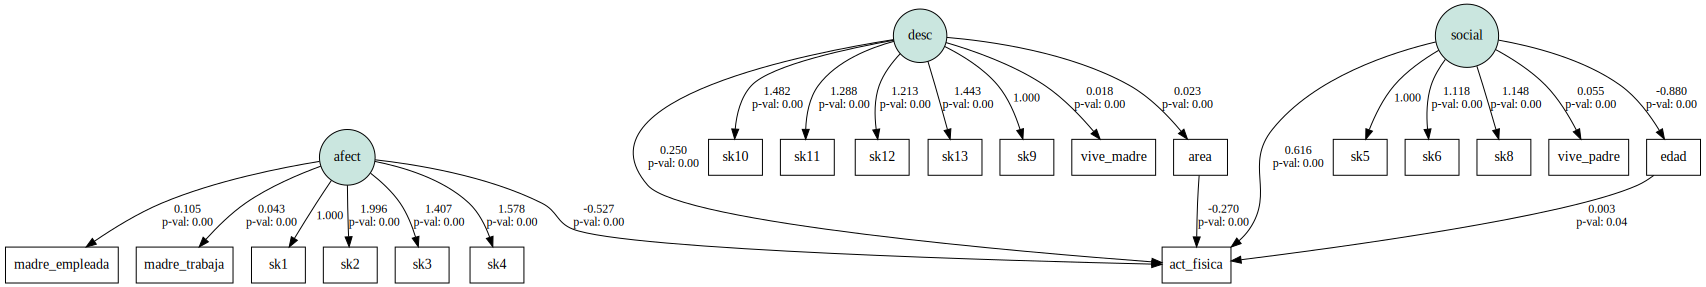

In [ ]:
semopy.semplot(mod, "semmodel.png")

Del ajuste del modelo se puede concluir que existe la posibiidad de generar factores a partir de las relaciones propuestas anteriormente, las cuales son significativas y que mediante la combinación de estos factores, en adisión con la edad y el area se puede estimar el nivel de actividad física de los individuos en la base de datos de estudio junaeb. Cabe destacar que las relaciones son significativas con un 99% de confianza, exceptuando la relación entre la edad y la actividad física, la cual es significativa al 95%.

# Anexo 1: Análisis de distribuciones

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59999 entries, 0 to 59998
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sexo        59999 non-null  int64  
 1   edad        59999 non-null  int64  
 2   imce        59999 non-null  float64
 3   vive_padre  59999 non-null  int64  
 4   vive_madre  59999 non-null  int64  
 5   sk1         59999 non-null  int64  
 6   sk2         59999 non-null  int64  
 7   sk3         59999 non-null  int64  
 8   sk4         59999 non-null  int64  
 9   sk5         59999 non-null  int64  
 10  sk6         59999 non-null  int64  
 11  sk7         59999 non-null  int64  
 12  sk8         59999 non-null  int64  
 13  sk9         59999 non-null  int64  
 14  sk10        59999 non-null  int64  
 15  sk11        59999 non-null  int64  
 16  sk12        59999 non-null  int64  
 17  sk13        59999 non-null  int64  
 18  act_fisica  58033 non-null  float64
 19  area        59999 non-nul

edad
80     11373
81      9889
79      9479
82      7983
83      5565
78      4194
84      2873
85      1549
86      1147
87       901
88       784
89       674
90       591
91       537
92       459
93       405
94       337
95       230
77       203
96       153
97       111
98        95
99        80
101       59
103       58
100       57
105       42
102       42
104       41
106       32
107       26
75         9
76         6
74         4
73         4
71         2
65         1
69         1
68         1
66         1
62         1
dtype: int64

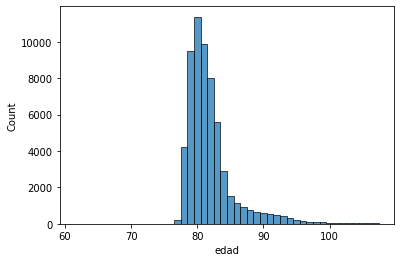

In [ ]:
var = 'edad'
sns.histplot(df, x = var, discrete=True)
df.value_counts(var)

In [ ]:
df.edad.mean(), df.edad.std()

(81.91931532192203, 3.815187887008648)

In [ ]:
df.edad.mean() - df.edad.std() * 3,df.edad.mean() + df.edad.std() * 3

(70.47375166089608, 93.36487898294797)

edad
80    11373
81     9889
79     9479
82     7983
83     5565
78     4194
84     2873
85     1549
86     1147
87      901
88      784
89      674
90      591
91      537
92      459
93      405
77      203
75        9
76        6
73        4
74        4
71        2
dtype: int64

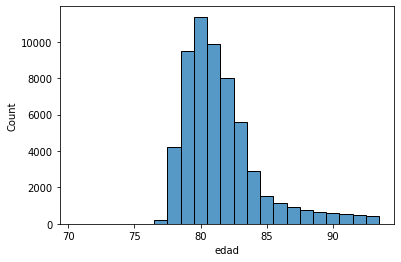

In [ ]:
df = df[(df.edad > df.edad.mean() - df.edad.std() * 3) & (df.edad < df.edad.mean() + df.edad.std() * 3)]
var = 'edad'
sns.histplot(df, x = var, discrete=True)
df.value_counts(var)

imce
 0.74    213
 0.73    206
 0.39    203
 0.87    203
 1.07    198
        ... 
-3.77      1
-3.75      1
-3.73      1
-3.67      1
-5.02      1
Length: 932, dtype: int64

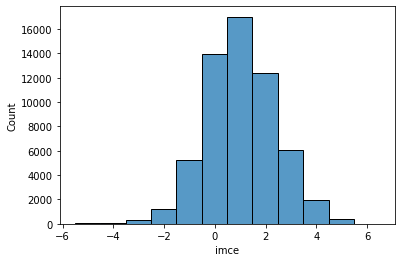

In [ ]:
var = 'imce'
sns.histplot(df, x = var, discrete=True)
df.value_counts(var)

vive_padre
1    42323
0    16285
2       23
dtype: int64

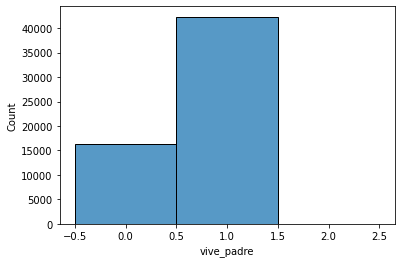

In [ ]:
var = 'vive_padre'
sns.histplot(df, x = var, discrete=True)
df.value_counts(var)

vive_madre
1    56563
0     1980
2       88
dtype: int64

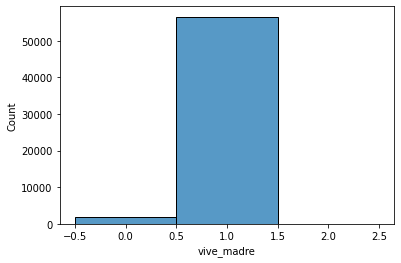

In [ ]:
var = 'vive_madre'
sns.histplot(df, x = var, discrete=True)
df.value_counts(var)

act_fisica
3.0    20725
2.0    19779
1.0     8662
5.0     4621
4.0     2957
dtype: int64

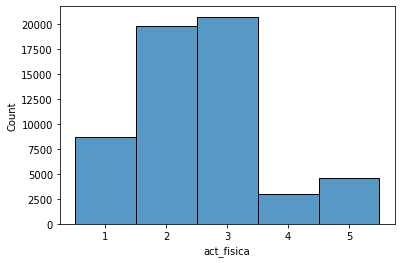

In [ ]:
var = 'act_fisica'
sns.histplot(df, x = var, discrete=True)
df.value_counts(var)

area
1    53180
0     5451
dtype: int64

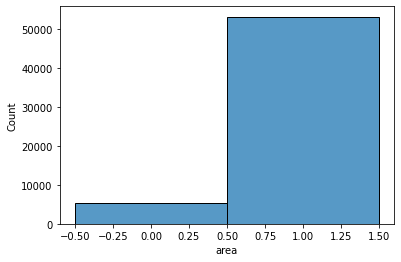

In [ ]:
var = 'area'
sns.histplot(df, x = var, discrete=True)
df.value_counts(var)

educm
13.0    25168
9.0      4921
15.0     3525
11.0     3462
16.0     3213
18.0     3136
17.0     3031
12.0     1908
10.0     1823
14.0     1420
20.0     1142
22.0     1018
7.0       968
8.0       962
6.0       575
5.0       532
19.0      421
4.0       314
3.0       196
0.0       113
2.0       103
dtype: int64

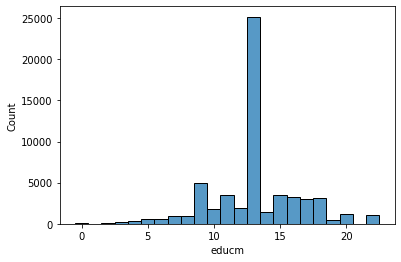

In [ ]:
var = 'educm'
sns.histplot(df, x = var, discrete=True)
df.value_counts(var)

educp
13    25430
9      5798
11     4051
17     3156
15     2899
18     2851
16     2323
10     2065
12     1986
20     1597
22     1082
14     1050
7       938
8       820
5       620
19      607
6       520
4       326
3       248
0       150
2       114
dtype: int64

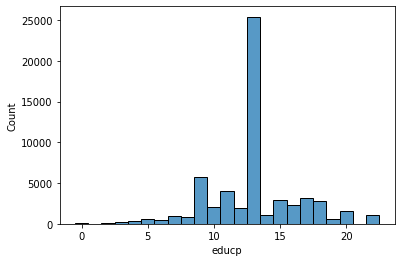

In [ ]:
var = 'educp'
sns.histplot(df, x = var, discrete=True)
df.value_counts(var)

madre_work
 1    28996
-1    23599
 0     6036
dtype: int64

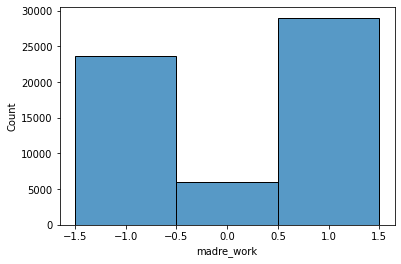

In [ ]:
# madre_work: si la madre trabaja (-1: labor domestica, 0: desempleada, 1: empleada)
var = 'madre_work'
sns.histplot(df, x = var, discrete=True)
df.value_counts(var)

# Anexo 2: Heatmap


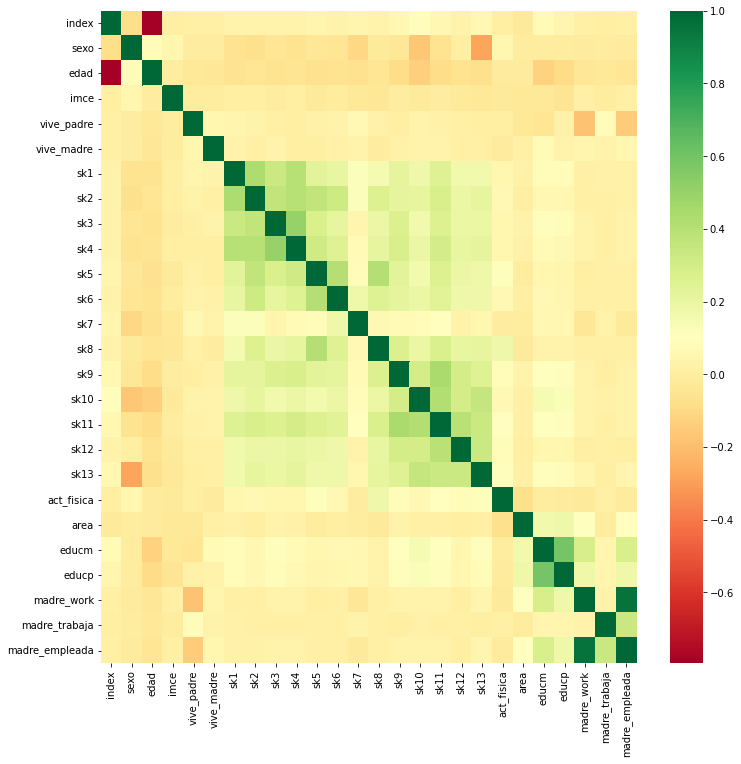

In [ ]:
fig, ax = plt.subplots(1,1, figsize = (12,12))
sns.heatmap(junaeb.corr(), cmap='RdYlGn', ax = ax) 

En general segun lo visto en el heatmap, la correlacion entre variables es mas bien baja llegando en algunos casos 0.5, pero no superior a eso, aunque de todas formas se tomará esta información en cuenta en caso de ser necesario. Importante notar que todas las correlaciones son positivas.